### 通过职业，工作事件长短，种族来预测性别

### 从疝气病症预测病马的死亡率

### 手写数字识别

导包，使用SVM

datasets读取数据

分割训练和预测数据train_test_split(可以放多个要分割的数据)

绘制前100个图片

创建SVC模型gamma =0.001  
训练数据

预测数据，可视化

### 手迹识别

导包

In [1]:
import pandas as pd
from pandas import Series,DataFrame

from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC

from sklearn.model_selection import train_test_split

#降维处理，不仅仅可以节省时间，更重要的可以提高准确性
from sklearn.decomposition import PCA

In [2]:
#读取数据
digits = pd.read_csv('./train.csv')
digits.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
digits.shape

(42000, 785)

In [5]:
import numpy as np

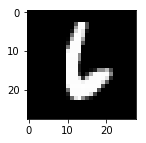

In [19]:
index = np.random.randint(0,42000,size = 1)

#对DataFrame操作，获取数据是df.loc[?]
#? == 数字 那么返回的数据就是Series
#？ == [数字]那么返回的结果是DataFrame
image = digits.loc[index[0]][1:].values.reshape((28,28))

plt.figure(figsize=(2,2))
plt.imshow(image,cmap = 'gray')

In [33]:
#42000个数据
digits['pixel20'].unique()

array([0])

In [35]:
#PCA 提高计算的精度而

y = digits['label']

In [36]:
x = digits.drop('label',axis = 1)
x.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
X_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.1)

In [39]:
knn = KNeighborsClassifier(n_neighbors= 10 )
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [41]:
knn.score(x_test,y_test)

KeyboardInterrupt: 

In [42]:
#使用pca进行降维
pca = PCA(n_components=150,whiten=True,svd_solver='randomized')

In [43]:
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=150, random_state=None,
  svd_solver='randomized', tol=0.0, whiten=True)

In [44]:
X_train_pca = pca.transform(X_train)
x_test_pca = pca.transform(x_test)

In [48]:
knn.fit(X_train_pca,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

???
进行PCA降维和不进行PCA降维的准确度，是否有差距

In [49]:
knn.score(x_test_pca,y_test)

0.86952380952380948

In [50]:
svc = SVC()

In [51]:
svc.fit(X_train_pca,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [53]:
import time

In [55]:
print(time.time())
svc_orignal = SVC()
svc_orignal.fit(X_train,y_train)
score = svc_orignal.score(x_test[-420:],y_test[-420:])
print('不进行数据降维，预测的准确率：%d'%(score))
print(time.time())

1510196966.2637584
不进行数据降维，预测的准确率：0
1510200943.6910596


In [52]:
svc.score(x_test_pca[-420:],y_test[-420:])

0.97619047619047616

### 人脸识别